常用的引用：numpy;  matplotlib.pyplot;  pandas

蒙提霍尔问题/三门问题（Monty Hall problem）.
该游戏涉及一个针对玩家的主持人，玩家位于三个门前，其中一个门后面是一辆车，其余门后面都是山羊。首先，玩家必须指明一扇门；然后主持人必须打开一扇门，既不是玩家选择的门也不是隐藏汽车的门；最后，玩家选择打开，最初选择的门还是剩下的第三个门。

设置工作区

In [14]:
%matplotlib inline

In [15]:
from random import randint, seed

In [16]:
from enum import Enum

In [17]:
import matplotlib.pyplot as plt

In [18]:
class Strategy(Enum):
    CHANGE = 1 #改变最初选择
    KEEP = 2 #坚持最初选择

In [38]:
seed()

def Hall_game(straregy):
    doors = [0, 1, 2]; #三个门
    good_door = randint(0, 2)  #在0到2范围内随机生成一个整数，作为有车的那个门号
    
    #玩家的选择
    first_choice = randint(0, 2)
    
    #剩下的两个门
    doors.remove(first_choice)
    
    #主持人选择的门
    if first_choice == good_door:
        doors.remove(doors[randint(0,1)])
    else:
        doors = [good_door]
    
    second_choice = 0    
    if straregy == Strategy.CHANGE:
        second_choice = doors[0]
    elif straregy == Strategy.KEEP:
        second_choice = first_choice
    else:
        raise ValueError("Strategy not recognized")
    
    return second_choice == good_door
                           

In [39]:
strategy = Strategy.CHANGE
Hall_game(strategy)

False

三元运算符:
condition_is_true if condition else condition_is_false

 列表推导式: variable = [ out_exp for out_exp in input_list if out_exp == 2 ]

In [47]:
def Play(strategy, nb_turns):
    return [1 if Hall_game(strategy) else 0 for i in range(nb_turns)] 

In [48]:
print("By changing doors, the player has won {} on 10,000 games.".format(sum(Play(Strategy.CHANGE, 10000))))
print("By keeping his initial choice, the player has won {} out of 10,000 games.".format(sum(Play(Strategy.KEEP,10000))))

By changing doors, the player has won 6745 on 10,000 games.
By keeping his initial choice, the player has won 3361 out of 10,000 games.


使用Numpy和Matplotlib操作数据. 

Numpy（Numerical Python）提供了一个存储和处理数据的接口.
Numpy数组就像Python列表，但是Numpy可以让事情变得更有效率，特别是对于更大的数组.

In [49]:
import numpy as np

和Python列表不同，Numpy数组只能包含一种类型的成员，有几种方法可以在Numpy中创建数组：

In [171]:
ar = np.array([1, 2, 3])
ar

array([1, 2, 3])

In [172]:
print(ar) #输出的是数组，不是列表，T眉头逗号哦！！ 此处是3行一列的一维数组

[1 2 3]


如果初始化列表中有不同类型的数据，Numpy会尝试把它们全部转化为最通用的类型。例如，整数int将转化为float类型

In [51]:
np.array([3.1, 4, 5, 6])

array([3.1, 4. , 5. , 6. ])

也可以手动设置类型

In [52]:
np.array([1, 2, 3], dtype = 'float32')

array([1., 2., 3.], dtype=float32)

用 array（） 函数创建数组时，里面可以列表、元组或者它们的组合，最后都会变成数组

In [173]:
arr1 = np.array(range(5)) #整型
arr2 = np.array([1.2,3.4,5.6]) #浮点
arr3 = np.array([[1,2,3],('a','b','c')]) #既有列表又有元组，且元素个数相同，最终各自包含每个元素都是变为结果数组中每个数组元素，且类型一致
arr4 = np.array([[1,2,3],('a','b','c','d')]) #列表和元组内元素个数不同，相当于数组里有两个元素，列表和元组
print(arr1, type(arr1), arr1.dtype)
print(arr2, type(arr2), arr2.dtype)
print(arr3, arr3.shape, arr3.ndim, arr3.size, arr3.dtype)# 数组、结构、维度、大小、类型
print(arr4, arr4.shape, arr4.ndim, arr4.size, arr4.dtype)

[0 1 2 3 4] <class 'numpy.ndarray'> int32
[1.2 3.4 5.6] <class 'numpy.ndarray'> float64
[['1' '2' '3']
 ['a' 'b' 'c']] (2, 3) 2 6 <U11
[list([1, 2, 3]) ('a', 'b', 'c', 'd')] (2,) 1 2 object


数组的转置

In [176]:
yw = np.array([1,2,3]) #一维数组转置是不变的
print(yw, yw.shape, yw.ndim)
ywT = yw.T
print(ywT, ywT.shape, ywT.ndim)
ew = np.array([[1,2],[3,4],[5,6]])
print(ew, ew.shape, ew.ndim)
ewT = ew.T
print(ewT, ewT.shape, ewT.ndim)

[1 2 3] (3,) 1
[1 2 3] (3,) 1
[[1 2]
 [3 4]
 [5 6]] (3, 2) 2
[[1 3 5]
 [2 4 6]] (2, 3) 2


可以连接两个或多个数组

In [89]:
a = np.array([1, 2, 3])
b = np.array([3, 2, 1])
c = np.array([7, 8, 9])
np.concatenate([a, b, c])

array([1, 2, 3, 3, 2, 1, 7, 8, 9])

Numpy有几个函数，可以直接创建数组，对于大型数组的创建时很有效的

In [90]:
np.empty(5)

array([0.2, 0.4, 0.6, 0.8, 1. ])

In [53]:
np.zeros(10, dtype = int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [54]:
np.ones((3, 5), dtype = float)

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [56]:
np.full((3, 5), 3.14)

array([[3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14]])

In [58]:
np.arange(0, 20, 2) #[0,20) 间隔是2

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [59]:
np.linspace(0, 1, 5) #[0,1] 5个数

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [61]:
np.linspace(0, 1, 7)

array([0.        , 0.16666667, 0.33333333, 0.5       , 0.66666667,
       0.83333333, 1.        ])

In [63]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [64]:
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

每个Numpy数组都有一些比较通用的属性

numpy.random.randint(low,high=None,size=None,dtype) . 
生成在半开半闭区间[low,high)上离散均匀分布的整数值;若high=None，则取值区间变为[0,low) 

In [70]:
np.random.seed(0) #如果不设置seed的值，每次就会生成不同的随机数，设置了之后就是生成相同的随机数了，而且这个值是起始值
x1 = np.random.randint(10, size = 6)
print("数组x1：",x1)
print("数组x1的维度：",x1.ndim)
print("数组x1的结构（就是几行几列）：", x1.shape)
print("数组x1的元素个数：", x1.size)
print("数组的元素类型：", x1.dtype)

数组x1： [5 0 3 3 7 9]
数组x1的维度： 1
数组x1的结构（就是几行几列）： (6,)
数组x1的元素个数： 6
数组的元素类型： int32


经常需要访问数组的一个或者多个元素

In [71]:
print(x1[0])

5


In [72]:
print(x1[-1]) #-1指的最后一个元素

9


In [74]:
print(x1[-2]) #-2指的倒数第二个元素，以此类推，就x1来说，-7开始就不行了

7


In [76]:
x2 = np.random.randint(10, size=(3, 4))
print(x2)

[[3 5 2 4]
 [7 6 8 8]
 [1 6 7 7]]


In [78]:
print(x2[0,1])

5


In [79]:
x1[1] = 3.14 #都变成int32类型
print(x1)

[5 3 3 3 7 9]


In [80]:
print(x1[0:5])

[5 3 3 3 7]


In [81]:
print(x1[:5])

[5 3 3 3 7]


In [82]:
print(x1[5:])

[9]


In [83]:
print(x1[::2]) #每两个输出一次

[5 3 7]


In [86]:
print(x2[0:])

[[3 5 2 4]
 [7 6 8 8]
 [1 6 7 7]]


In [ ]:
print(x2[0:1])

In [87]:
print(x2[:,1]) #取第一列

[5 6 6]


In [88]:
print(x2[0:2,2]) #第0行和第1行的第2列

[2 8]


使用Numpy定义

In [91]:
def reverse_calculation(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0/values[i]
    return output

values = np.random.randint(1, 10, size = 5)
print(reverse_calculation(values))

[0.11111111 0.5        0.16666667 0.11111111 0.2       ]


In [93]:
x = np.arange(4)
print("x = ", x)

x =  [0 1 2 3]


In [95]:
print("x + 5 = ", x + 5)

x + 5 =  [5 6 7 8]


In [96]:
print("x - 5 = ", x - 5)

x - 5 =  [-5 -4 -3 -2]


In [97]:
print("x * 2 = ", x * 2)

x * 2 =  [0 2 4 6]


In [98]:
print("x / 2 = ", x / 2)

x / 2 =  [0.  0.5 1.  1.5]


In [99]:
print("x // 2 = ", x // 2)

x // 2 =  [0 0 1 1]


In [101]:
xx = np.full((2, 3), 3)
print("xx = ", xx)

xx =  [[3 3 3]
 [3 3 3]]


In [102]:
print("xx + 5 = ", xx + 5)

xx + 5 =  [[8 8 8]
 [8 8 8]]


In [122]:
x = [-6, -3, 2, 5]
print("x = ", x)
print("取绝对值：", np.abs(x))

x =  [-6, -3, 2, 5]
取绝对值： [6 3 2 5]


In [113]:
print("求指数：", np.exp(x)) #e的几次方

求指数： [2.47875218e-03 4.97870684e-02 7.38905610e+00 1.48413159e+02]


In [114]:
print("求对数：", np.log(np.abs(x))) #求以e为底的对数,也可以指明以谁为底：log10这样

求对数： [1.79175947 1.09861229 0.69314718 1.60943791]


In [119]:
x = np.random.rand(4,4) 
print("x = ", x)

x =  [[0.31542835 0.36371077 0.57019677 0.43860151]
 [0.98837384 0.10204481 0.20887676 0.16130952]
 [0.65310833 0.2532916  0.46631077 0.24442559]
 [0.15896958 0.11037514 0.65632959 0.13818295]]


In [121]:
x > 0.7

array([[False, False, False, False],
       [ True, False, False, False],
       [False, False, False, False],
       [False, False, False, False]])

In [126]:
x = np.random.randint(10, size = 5)
print("x = ", x)

x =  [1 2 4 2 0]


In [127]:
x > 2

array([False, False,  True, False, False])

Numpy的运算

点积运算

In [182]:
xar = np.array([[1,2],[3,4]])
yar = np.array([[5,6],[7,8]])
v = np.array([9,10])
w = np.array([11,12])

In [183]:
# 9x11 + 10x12 = 219
print(v.dot(w))
print(np.dot(v, w))

219
219


In [184]:
# 就是矩阵的相乘运算
print(xar.dot(yar))
print(np.dot(xar, yar))

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


求和运算

In [185]:
xxAr = np.array([[1,2],[3,4]])
print(np.sum(xxAr)) #默认求和 把所有的元素都加起来
print(np.sum(xxAr, axis=0)) #=0的时候，计算每列的和
print(np.sum(xxAr, axis=1)) #=1的时候，计算每行的和

10
[4 6]
[3 7]


使用Matplotlib处理数据. 
使用matplotlib主要是为了直接从Python生成图形

In [129]:
plt.style.use('seaborn-whitegrid') #设置画图风格

绘制一个sin曲线

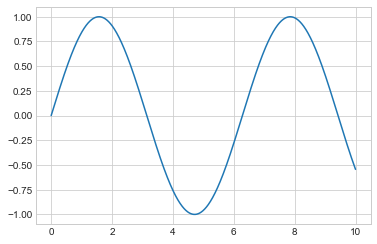

In [132]:
fig = plt.figure() #画板
ax = plt.axes() #画纸    xAxis和yAxis是坐标系
x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x))

在离散数据集（点）的情况下，我们经常使用误差线来表示每个点的不确定性，以确定其准确值

<ErrorbarContainer object of 3 artists>

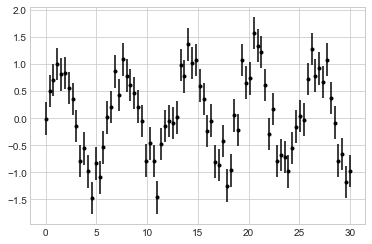

In [133]:
x = np.linspace(0, 30, 80)
dy = 0.3
y = np.sin(x) + dy * np.random.randn(80)

plt.errorbar(x, y, yerr = dy, fmt = '.k')

绘制散点图

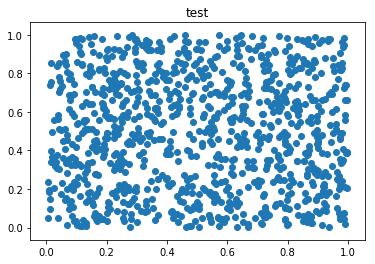

In [216]:
import matplotlib.pyplot as plt
sample1 = np.random.rand(1000)
sample2 = np.random.rand(1000)
plt.scatter(sample1,sample2) #绘制散点图
plt.title('test')
plt.show()

Pandas库是Python中数据科学的基本库之一。Pandas提供易于使用且功能强大的数据结构以及快速使用它们的方法。

pandas可用numpy数组表示

In [2]:
import numpy as np
panda_numpy = np.array([200, 50, 100, 80])
panda_numpy

array([200,  50, 100,  80])

In [3]:
family = [
    np.array([100, 5, 20, 80]), #mom
    np.array([50, 2.5, 10, 40]), #baby
    np.array([110, 6, 22, 80]) #daddy
]

可用于表示数组的对象是DataFrame对象

In [5]:
import pandas as pd
family_df = pd.DataFrame(family)
family_df

,0,1,2,3
0,100.0,5.0,20.0,80.0
1,50.0,2.5,10.0,40.0
2,110.0,6.0,22.0,80.0


In [6]:
family_df = pd.DataFrame(family,
                        index = ['mom', 'baby', 'dad'],
                        columns = ['legs', 'hair', 'hands', 'belly'])
family_df

,legs,hair,hands,belly
mom,100.0,5.0,20.0,80.0
baby,50.0,2.5,10.0,40.0
dad,110.0,6.0,22.0,80.0


DataFrame的一些小功能

访问数组的某一列

In [7]:
family_df.belly
family_df["belly"]

mom     80.0
baby    40.0
dad     80.0
Name: belly, dtype: float64

访问某一行

In [43]:
family_df.loc["mom"]

legs     100.0
hair       5.0
hands     20.0
belly     80.0
Name: mom, dtype: float64

In [45]:
family_df.loc["baby", ["legs", "hair"]] #baby行的 legs和hair列

legs    50.0
hair     2.5
Name: baby, dtype: float64

In [46]:
family_df.loc[:, ["hands"]] #所有行的hands列

,hands
mom,20.0
baby,10.0
dad,22.0


通过行号进行索引

In [47]:
family_df.iloc[0:] #索引所有行

,legs,hair,hands,belly
mom,100.0,5.0,20.0,80.0
baby,50.0,2.5,10.0,40.0
dad,110.0,6.0,22.0,80.0


In [48]:
family_df.iloc[:, [1]] #索引所有行的第2列

,hair
mom,5.0
baby,2.5
dad,6.0


通过iterrows 返回一个元祖，遍历整个元组的内容

In [15]:
for ind, content in family_df.iterrows():
    print("Family:  %s:" %ind)
    print(content)

Family:  mom:
legs     100.0
hair       5.0
hands     20.0
belly     80.0
Name: mom, dtype: float64
Family:  baby:
legs     50.0
hair      2.5
hands    10.0
belly    40.0
Name: baby, dtype: float64
Family:  dad:
legs     110.0
hair       6.0
hands     22.0
belly     80.0
Name: dad, dtype: float64


创建一个CSV文件

In [154]:
%%writefile dataset.csv

n1, n2, n3, n4, n5
10, 20, NaN, 40, Yes
b1, 25, 35, 45, No
18, 28, 38, 48, No

Overwriting dataset.csv


Pandas库是指向数组操作的指针。因此，可以用Pandas读取CSV文件：从CSV创建数据框只需要一行

data变量现在包含一个包含csv文件数据的数据帧；
csv文件中的值室友符号 ; 分隔的；
默认情况下，pd.read_csv期望以逗号分隔的值

In [155]:
data = pd.read_csv("dataset.csv")

In [156]:
data

,n1,n2,n3,n4,n5
0,10,20,NaN,40,Yes
1,b1,25,35,45,No
2,18,28,38,48,No


In [159]:
X = data.iloc[:, 4].values
Y = data.iloc[:, 1:3].values
print("X")
print(X)
print("Y")
print(Y)

X
[' Yes' ' No' ' No']
Y
[[20 ' NaN']
 [25 ' 35']
 [28 ' 38']]


处理丢失的数据。用整列的平均值或者中间值替换丢失的数据。用sklearn.preprocessing库中的Imputer类完成这项任务

In [164]:
from sklearn.preprocessing import Imputer
# axis = 0 表示按列进行
imputer = Imputer(missing_values = "NaN", strategy = "mean", axis = 0)
imputer = imputer.fit(Y[:,1:3])
Y[:,1:3] = imputer.transform(Y[:,1:3])
print("处理后的Y：")
print(Y)

处理后的Y：
[[20 36.5]
 [25 35.0]
 [28 38.0]]


解析分类数据

分类数据是指含有标签值而不是数字值的变量，取值范围通常是固定的。例如“Yes”和“No”不能用于模型的数学计算，所以需要解析成数字。为实现这一功能，从sklearn.preprocessing库导入LabelEncoder类

In [165]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X = labelencoder_X.fit_transform(X)
print("处理过的X：")
print(X)

处理过的X：
[1 0 0]


拆分数据集为测试集合和训练集合

把数据集拆成两个：一个是用来训练模型的训练集合，另一个是用来验证模型的测试集合。两者比例一般是80:20，导入sklearn.model_selection库中的train_test_split()方法

In [166]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
print("X_train: ")
print(X_train)
print("X_test: ")
print(X_test)
print("Y_train: ")
print(Y_train)
print("Y_test: ")
print(Y_test)

X_train: 
[0 1]
X_test: 
[0]
Y_train: 
[[25 35.0]
 [20 36.5]]
Y_test: 
[[28 38.0]]


特征量化

大部分模型算法使用两点间的欧式距离表示，但次特征在幅度、单位和范围姿态问题上变化很大。在距离计算中，高幅度的特征比低幅度的特征权重更大。可用特征标准化或Z值归一化解决。导入sklearn.processing库中的StandardScalar类。

In [169]:
from sklearn.preprocessing import StandardScaler
sc_Y = StandardScaler()
Y_train = sc_Y.fit_transform(Y_train)
Y_test = sc_Y.fit_transform(Y_test)
print("Y_train")
print(Y_train)
print("Y_test")
print(Y_test)

Y_train
[[ 1. -1.]
 [-1.  1.]]
Y_test
[[0. 0.]]


C:\Users\Administrator.PC-20180806IONF\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


图像操作:  from scipy.misc import imread, imsave， imresize被替换了  

In [207]:
from imageio import imread, imwrite 
img = imread('C:/Users/Administrator.PC-20180806IONF/Pictures/girl.jpg')
print(img.dtype, img.shape)

uint8 (492, 500, 3)


In [208]:
from skimage.transform import resize
img_tinted = img * [1, 0.95, 0.9]
img_tinted = resize(img_tinted, (200,300))
imwrite('C:/Users/Administrator.PC-20180806IONF/Pictures/girl.jpg', img_tinted)

C:\Users\Administrator.PC-20180806IONF\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Administrator.PC-20180806IONF\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


点和点之间的关系

In [209]:
from scipy.spatial.distance import pdist, squareform
x3 = np.array([[0,1], [1,0], [2,0]])
print(x3)

[[0 1]
 [1 0]
 [2 0]]


In [211]:
d = squareform(pdist(x3, 'euclidean')) #计算每个向量对的距离，并转为矩阵形式
print(d)

[[0.         1.41421356 2.23606798]
 [1.41421356 0.         1.        ]
 [2.23606798 1.         0.        ]]
